#CafChem Cirq examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/MauricioCafiero/CafChemQuantum/blob/main/QC_Cirq_CafChem.ipynb)

## This notebook allows you to:
- Load and import Cirq libraries
- Create entanglement circuits
- Create teleportation circuits
- Create a Grover's algorith circuit
- Simulate Circuits

## Requirements:

- Runs well on CPU

## Install and Import

In [2]:
! pip install -q cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.9 MB/s eta 0:00:00


In [3]:
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np

## One qubit, apply Hadamard gate and measure

---



In [52]:
qubit = cirq.LineQubit(0)
cirquit = cirq.Circuit(cirq.H(qubit), cirq.measure(qubit, key='result'))

simulator = cirq.Simulator()
result = simulator.run(cirquit, repetitions=1000)
counts = result.histogram(key='result')
print(f'total counts: {counts}')

total counts: Counter({1: 511, 0: 489})


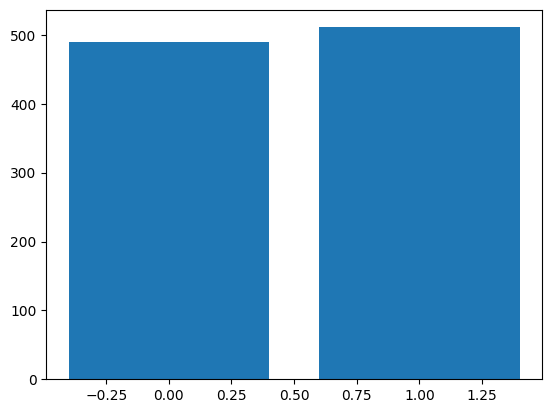

In [53]:
#display counts in a bar chart
from matplotlib import pyplot as plt
plt.bar(counts.keys(), counts.values())
plt.show()

## Entangle qubits

In [55]:
class entangle_qubits():
  '''
  '''
  def __init__ (self,initial_state: str):
    '''
    '''
    self.initial_state = initial_state

  def entangle_qubits(self):
    '''
    '''
    self.num_qubits = len(self.initial_state)
    self.qubits = cirq.LineQubit.range(self.num_qubits)
    self.circuit = cirq.Circuit()
    self.simulator = cirq.Simulator()

    # set initial state:
    for i, char in enumerate(self.initial_state):
      if char == '1':
        self.circuit.append(cirq.X(self.qubits[i]))

    # entangle qubits
    self.circuit.append(cirq.H(self.qubits[0]))
    for i in range(1, self.num_qubits):
      self.circuit.append(cirq.CNOT(self.qubits[0], self.qubits[i]))

    # visualize state
    result = self.simulator.simulate(self.circuit)
    print(result)

  def simulate(self):
    '''
    '''
    if self.num_qubits == 2:
      state_hash = {0: '|00>', 1: '|01>', 2: '|10>', 3: '|11>'}
    elif self.num_qubits == 3:
      state_hash = {0: '|000>', 1: '|001>', 2: '|010>', 3: '|011>',
                    4: '|100>', 5: '|101>', 6: '|110>', 7: '|111>'}

    self.circuit.append(cirq.measure(*self.qubits, key='result'))
    result = self.simulator.run(self.circuit, repetitions=1000)
    counts = result.histogram(key='result')
    for keys in counts.keys():
      print(f'{state_hash[keys]} : {counts[keys]}')


### Two qubits

In [56]:
for state in ['00', '01', '10', '11']:
  print(f'initial state: {state} ============================')
  exp = entangle_qubits(state)
  exp.entangle_qubits()
  exp.simulate()
  print('')

initial state: 00 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩
|11> : 495
|00> : 505

initial state: 01 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|01⟩ + 0.707|10⟩

phase:
output vector: |⟩
|01> : 541
|10> : 459

initial state: 10 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ - 0.707|11⟩

phase:
output vector: |⟩
|00> : 497
|11> : 503

initial state: 11 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|01⟩ - 0.707|10⟩

phase:
output vector: |⟩
|10> : 485
|01> : 515



In [57]:
print(exp.circuit)

0: ───X───H───@───M('result')───
              │   │
1: ───X───────X───M─────────────


### Three qubits

In [58]:
for state in ['000', '001', '010', '011', '100', '101', '110', '111']:
  print(f'initial state: {state} ============================')
  exp = entangle_qubits(state)
  exp.entangle_qubits()
  exp.simulate()
  print('')

initial state: 000 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.707|000⟩ + 0.707|111⟩

phase:
output vector: |⟩
|000> : 500
|111> : 500

initial state: 001 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.707|001⟩ + 0.707|110⟩

phase:
output vector: |⟩
|110> : 497
|001> : 503

initial state: 010 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.707|010⟩ + 0.707|101⟩

phase:
output vector: |⟩
|010> : 478
|101> : 522

initial state: 011 ============================
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.707|011⟩ + 0.707|100⟩

phase:
output vector: |⟩
|011> : 526
|100> : 474

initial state: 100 ============================
meas

In [59]:
print(exp.circuit)

0: ───X───H───@───@───M('result')───
              │   │   │
1: ───X───────X───┼───M─────────────
                  │   │
2: ───X───────────X───M─────────────


## Teleportation

In [60]:
def teleportation():
  '''
  teleport a qubit from source to target
  '''
  three_states = ['000', '001', '010', '011', '100', '101', '110', '111']
  two_states = ['00', '01', '10', '11']

  qubits = cirq.LineQubit.range(3)
  circuit = cirq.Circuit()
  rz_gate = cirq.rx(np.pi/2)
  ry_gate = cirq.ry(2*np.pi/3)
  simulator = cirq.Simulator()

  # put source into random state
  circuit.append([rz_gate(qubits[0]), ry_gate(qubits[0])])

  result = simulator.simulate(circuit)
  print(f'Initial source state: {result}')
  print('\n')

  #apply hadamard to messenger, entangle messenger and target
  circuit.append(cirq.H(qubits[1]))
  circuit.append(cirq.CNOT(qubits[1], qubits[2]))

  circuit.append(cirq.CNOT(qubits[0], qubits[1]))
  circuit.append(cirq.H(qubits[0]))

  #measure messenger
  result = simulator.simulate(circuit)
  print(f'After teleportation: {result}')
  print('\n')


  #choose a random integer for measurement
  state_choice = np.random.randint(0,4)
  measured_state = two_states[state_choice]
  print(f'Source and messenger measured state: {measured_state}')

  new_coeffs = []
  for state, coeff in zip(three_states, result.final_state_vector):
    if state[:2] == measured_state:
      new_coeffs.append(coeff)
    else:
      new_coeffs.append(0)

  #normalize new_coeffs
  new_coeffs = new_coeffs / np.linalg.norm(new_coeffs)

  # create new circuit from state vector
  prep_op = cirq.StatePreparationChannel(new_coeffs)(*qubits)

  # 4. Create the circuit
  post_measured_circuit = cirq.Circuit(prep_op)

  results = simulator.simulate(post_measured_circuit)
  print(f'post-measurement state: {results}')
  print('\n')

  # test state transfer
  #for state, coeff in zip(three_states, results.final_state_vector):
  #  print(f'|{state[2]}>: {coeff}')

  #create target final state:
  target_state = [coeff for coeff in results.final_state_vector if coeff != 0]
  target_state = target_state / np.linalg.norm(target_state)

  #create target final circuit
  prep_op = cirq.StatePreparationChannel(target_state)(qubits[2])
  target_circuit = cirq.Circuit(prep_op)

  result = simulator.simulate(target_circuit)
  print(f'target final state: {result}')
  print('\n')

  # transform back
  if measured_state == '00':
    print('applying I')
    target_circuit.append(cirq.I(qubits[2]))
  elif measured_state == '01':
    print('applying X')
    target_circuit.append(cirq.X(qubits[2]))
  elif measured_state == '10':
    print('applying Z')
    target_circuit.append(cirq.Z(qubits[2]))
  elif measured_state == '11':
    print('applying XZ')
    target_circuit.append(cirq.X(qubits[2]))
    target_circuit.append(cirq.Z(qubits[2]))

  result = simulator.simulate(target_circuit)
  print(f'final, transformed state: {result}')




In [61]:
teleportation()

Initial source state: measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: (0.354+0.612j)|0⟩ + (0.612-0.354j)|1⟩

phase:
output vector: |⟩


After teleportation: measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: (0.177+0.306j)|000⟩ + (0.306-0.177j)|001⟩ + (0.306-0.177j)|010⟩ + (0.177+0.306j)|011⟩ + (0.177+0.306j)|100⟩ + (-0.306+0.177j)|101⟩ + (-0.306+0.177j)|110⟩ + (0.177+0.306j)|111⟩

phase:
output vector: |⟩


Source and messenger measured state: 01
post-measurement state: measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: (0.612-0.354j)|010⟩ + (0.354+0.612j)|011⟩

phase:
output vector: |⟩


target final state: measurements: (no measurements)

qubits: (cirq.LineQubit(2),)
output vector: (0.612-0.354j)|0⟩ + (0.354+0.612j)|1⟩

phase:
output vector: |⟩


applying X
final, transformed state: measurements: (no measurements)

qubits: (cirq.L

## Grover's Algorithm

In [62]:
class Grover():
  '''
  Grover's search algorithm
  '''
  def __init__ (self, target_state: str):
    '''
    '''
    self.target_state = target_state
    self.num_qubits = len(target_state)
    self.num_iterations = int(np.pi/4 * np.sqrt(2**self.num_qubits))
    self.qubits = cirq.LineQubit.range(self.num_qubits)
    self.simulator = cirq.Simulator()
    self.multi_cz = cirq.ControlledGate(sub_gate=cirq.Z,
                      num_controls=len(self.qubits) - 1)

  def oracle(self):
    '''
    '''
    qc_oracle = cirq.Circuit()
    for i, char in enumerate(self.target_state):
      if char == '0':
        qc_oracle.append(cirq.X(self.qubits[i]))

    #append a multi-controlled Z gate
    qc_oracle.append(self.multi_cz(*self.qubits))

    for i, char in enumerate(self.target_state):
      if char == '0':
        qc_oracle.append(cirq.X(self.qubits[i]))

    return qc_oracle

  def diffusion(self):
    '''
    '''
    qc_diffusion = cirq.Circuit()

    for i in range(self.num_qubits):
      qc_diffusion.append(cirq.H(self.qubits[i]))

    for i in range(self.num_qubits):
      qc_diffusion.append(cirq.X(self.qubits[i]))

    qc_diffusion.append(self.multi_cz(*self.qubits))

    for i in range(self.num_qubits):
      qc_diffusion.append(cirq.X(self.qubits[i]))

    for i in range(self.num_qubits):
      qc_diffusion.append(cirq.H(self.qubits[i]))

    return qc_diffusion

  def grover(self):
    '''
    '''

    three_states = ['000', '001', '010', '011', '100', '101', '110', '111']

    print(f'The target state is: {self.target_state}')
    qc_grover = cirq.Circuit()

    for i in range(self.num_qubits):
      qc_grover.append(cirq.H(self.qubits[i]))

    for i in range(self.num_iterations):
      qc_grover.append(self.oracle())
      qc_grover.append(self.diffusion())

    qc_grover.append(cirq.measure(*self.qubits, key='result'))

    result = self.simulator.run(qc_grover, repetitions=1000)
    counts = result.histogram(key='result')

    state_idx = np.argmax(list(counts.values()))
    print(f'The measured state is: {three_states[list(counts.keys())[state_idx]]}')
    print('')

    for keys in counts.keys():
      print(f'{three_states[keys]} : {counts[keys]}')


In [63]:
test_grover = Grover('011')
test_grover.grover()

The target state is: 011
The measured state is: 011

011 : 942
100 : 10
000 : 6
111 : 6
110 : 11
010 : 9
001 : 10
101 : 6
